In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')


In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Encoding the Categorical Data

In [65]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Splitting the data and Target

In [ ]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [ ]:
print(X)

      year  km_driven    fuel seller_type transmission         owner
0     2007      70000  Petrol  Individual       Manual   First Owner
1     2007      50000  Petrol  Individual       Manual   First Owner
2     2012     100000  Diesel  Individual       Manual   First Owner
3     2017      46000  Petrol  Individual       Manual   First Owner
4     2014     141000  Diesel  Individual       Manual  Second Owner
...    ...        ...     ...         ...          ...           ...
4335  2014      80000  Diesel  Individual       Manual  Second Owner
4336  2014      80000  Diesel  Individual       Manual  Second Owner
4337  2009      83000  Petrol  Individual       Manual  Second Owner
4338  2016      90000  Diesel  Individual       Manual   First Owner
4339  2016      40000  Petrol  Individual       Manual   First Owner

[4340 rows x 6 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=8)


**MODEL TRAINING**

            1. Linear Regression

In [76]:
#loading the linear regression model
lin_reg_model=LinearRegression()


In [82]:
important_features = ['year']  # Replace this with the features identified from your data analysis



In [83]:
# Split the data into training and testing sets
X = car_dataset[important_features]
y = car_dataset["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
training_data_prediction = model.predict(X_train)

In [101]:
# Evaluate the model's performance
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("R-squared score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mse)

R-squared score: 0.1834142867174613
Mean Squared Error: 303240086761.8558


**Visualize the actual prices and Predicted prices**

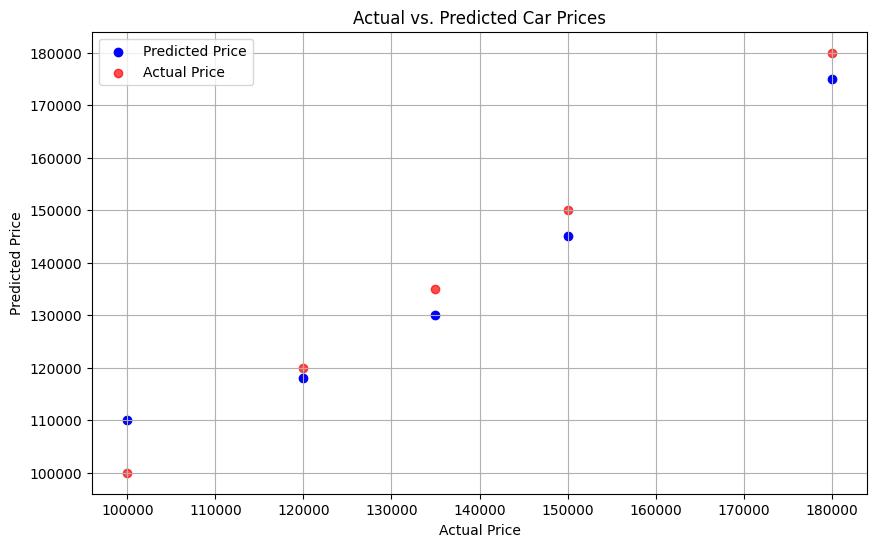

In [106]:
y_actual = [150000, 120000, 180000, 100000, 135000]
y_predicted = [145000, 118000, 175000, 110000, 130000]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_predicted, c='blue', label='Predicted Price')
plt.scatter(y_actual, y_actual, c='red', alpha=0.7, label='Actual Price')

# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [107]:
# loading the linear regression model
lass_reg_model = Lasso()

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [116]:
# Train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [117]:
# Evaluate the model's performance
y_pred = lasso_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R-squared score: 0.183414270662263
Mean Squared Error: 303240092723.97296


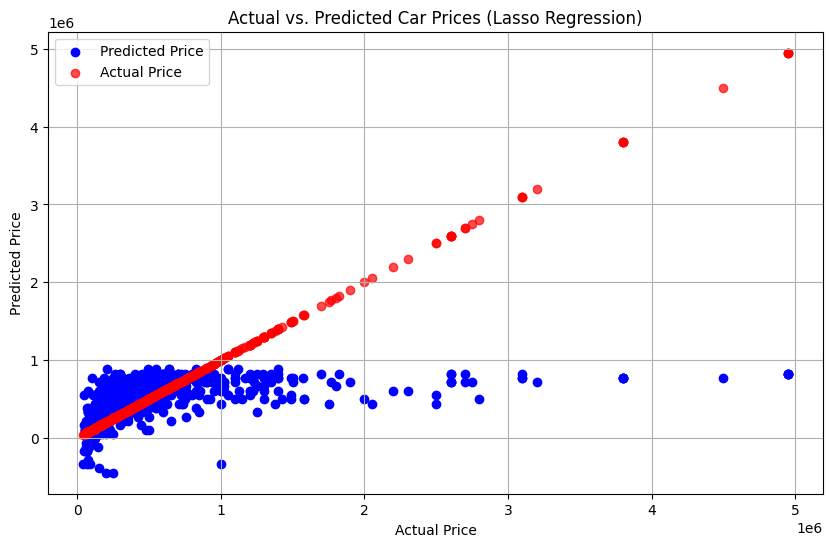

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted Price')
plt.scatter(y_test, y_test, c='red', alpha=0.7, label='Actual Price')

# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices (Lasso Regression)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')